In [1]:
## In this notebook, we will use KNN to classification model
# to classify indiviuals into life stages in the coming year using this years' size
# data

In [2]:
# First step: import necessary libraries, training set, and 
# validation set
import numpy as np
import pandas as pd

train = pd.read_csv('Train.csv')
val = pd.read_csv('Validation.csv')

In [3]:
# Turn data and labels into numpy arrays
X_train = train[['Length03','Width03','LeafArea03']].to_numpy()
X_val = val[['Length04','Width04','LeafArea04']].to_numpy()

Y_train = train['Stage04'].to_numpy()
Y_val = val['Stage05'].to_numpy()

In [4]:
# Load KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# Load matplotlib for plotting results
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

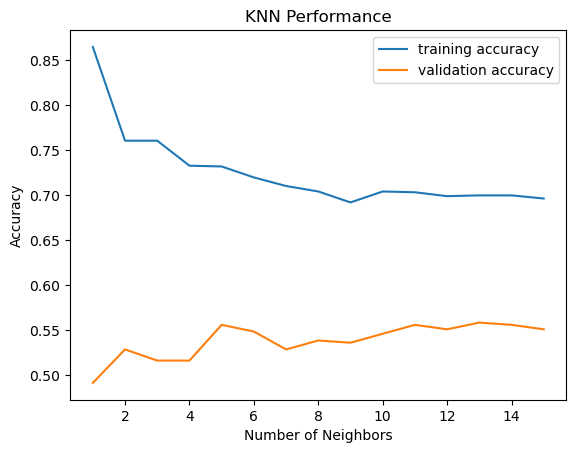

In [5]:
# Perform an iteration over the number of neighbors used
# Choose optimal k based on validation set performance
trainingAccuracy = []
validationAccuracy = []
kValues = range(1,16)
for k in kValues:
    # build model
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,Y_train)
    # record training accuracy
    trainingAccuracy.append(knn.score(X_train,Y_train))
    # record validation accuracy
    validationAccuracy.append(knn.score(X_val,Y_val))

# plot results
plt.plot(kValues,trainingAccuracy,label = "training accuracy")
plt.plot(kValues,validationAccuracy,label = "validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.title("KNN Performance")
plt.legend()
plt.savefig('knnCV.png',bbox_inches='tight')
plt.show

In [6]:
# There is a nice peak at k = 5, so we extract this value
# as the optimal value of k to use

In [7]:
# The important part of our model is not to predict the future stage on an
# individual. It is about modeling general population dynamics in time
# Therefore, this lower accuracy is not too worrisome
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,Y_train)

# Let's see how the optimal KNN performs relative to the PPM using
# the same performance metric
Y_predicted = knn.predict(X_val)

In [8]:
# Next, create a confusion matrix to visualize errors
from sklearn import metrics
confusionMatrix = metrics.confusion_matrix(Y_val, Y_predicted)
cmDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix)

Heatmap Labels:  {'not emerged': 0, 'oneleaf': 1, 'nonflowering': 2, 'seedling': 3, 'flowering': 4}


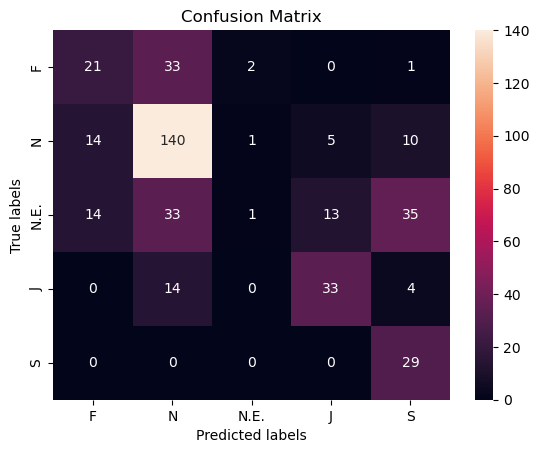

In [17]:
import seaborn as sns
 
ax= plt.subplot()
sns.heatmap(confusionMatrix, annot=True,fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['F','N','N.E.','J','S']);
ax.yaxis.set_ticklabels(['F','N','N.E.','J','S']);
plt.savefig('knnCM.png',bbox_inches='tight')
plt.show()

In [10]:
# Get counts of each stage for true and predicted arrays
True_unique_values, True_counts = np.unique(Y_val, return_counts=True)
Pred_unique_values, Pred_counts = np.unique(Y_predicted, return_counts = True)

# Align results in corresponding vectors
True_dict = {}
for value, count in zip(True_unique_values, True_counts):
    True_dict[value] = count
Pred_dict = {}
for value, count in zip(Pred_unique_values, Pred_counts):
    Pred_dict[value] = count

True_dist = np.zeros(5)
Pred_dist = np.zeros(5)
idx = 0
for value in True_unique_values:
    True_dist[idx] = True_dict[value]
    Pred_dist[idx] = Pred_dict[value]
    idx += 1


In [11]:
print("Order of elements in population vector:\n",True_unique_values)
print("True distribution:\n",True_dist)
print("Predicted distribution:\n",Pred_dist)

Order of elements in population vector:
 ['flowering' 'nonflowering' 'not emerged' 'oneleaf' 'seedling']
True distribution:
 [ 57. 170.  96.  51.  29.]
Predicted distribution:
 [ 49. 220.   4.  51.  79.]


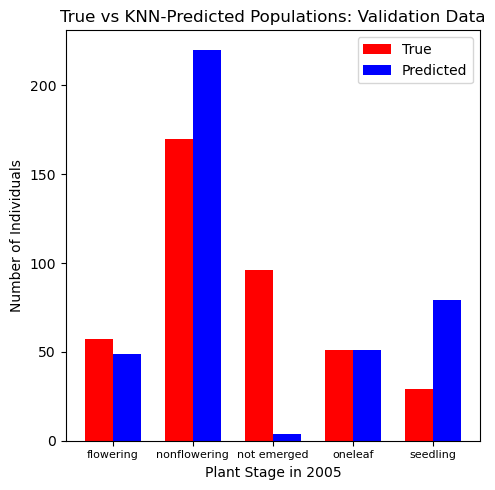

In [12]:
# Visualize predicted and true populations

# create plot
fig, ax = plt.subplots(figsize=(5, 5))
bar_width = 0.35
X = np.arange(5)

p1 = plt.bar(X, True_dist, bar_width, color='r',
label='True')

# The bar of second plot starts where the first bar ends
p2 = plt.bar(X + bar_width, Pred_dist, bar_width,
color='b',
label='Predicted')

plt.xlabel('Plant Stage in 2005')
plt.ylabel('Number of Individuals')
#plt.text(X[0],150,"Error Rate: 0.19")
plt.title('True vs KNN-Predicted Populations: Validation Data')
plt.xticks(X + (bar_width/2),True_unique_values, fontsize = 8)
plt.legend()

plt.tight_layout()
plt.savefig('knnValidationPerformance.png', bbox_inches='tight')
plt.show()


In [13]:
# Finally, let's calculate the differnce in the populations
Error = np.absolute(True_dist - Pred_dist)
populationErrorRate = sum(Error)/sum(Pred_dist)
print("Population Error Rate: ",populationErrorRate)

Population Error Rate:  0.49627791563275436


In [14]:
# It turns out that this is a very poor model. We will try and see
# if a PPM or Decision Tree can perform better